In [2]:
import pandas as pd

# Buka file .arff sebagai teks
with open('chronic_kidney_disease_full.arff', 'r') as f:
    lines = f.readlines()

# Pisahkan bagian data
data_started = False
data_rows = []
attributes = []

for line in lines:
    line = line.strip()
    if line.lower().startswith('@attribute'):
        attr_name = line.split()[1]
        attributes.append(attr_name)
    elif line.lower() == '@data':
        data_started = True
    elif data_started:
        if line:  # kalau bukan baris kosong
            row = line.split(',')
            data_rows.append(row)

# Buat DataFrame
df_raw = pd.DataFrame(data_rows, columns=attributes)
df_raw.head(401)


,'age','bp','sg','al','su','rbc','pc','pcc','ba','bgr',...,'pcv','wbcc','rbcc','htn','dm','cad','appet','pe','ane','class'
0,48,80,1.020,1,0,?,normal,notpresent,notpresent,121,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7,50,1.020,4,0,?,normal,notpresent,notpresent,?,...,38,6000,?,no,no,no,good,no,no,ckd
2,62,80,1.010,2,3,normal,normal,notpresent,notpresent,423,...,31,7500,?,no,yes,no,poor,no,yes,ckd
3,48,70,1.005,4,0,normal,abnormal,present,notpresent,117,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51,80,1.010,2,0,normal,normal,notpresent,notpresent,106,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55,80,1.020,0,0,normal,normal,notpresent,notpresent,140,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,42,70,1.025,0,0,normal,normal,notpresent,notpresent,75,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,12,80,1.020,0,0,normal,normal,notpresent,notpresent,100,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,17,60,1.025,0,0,normal,normal,notpresent,notpresent,114,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [1]:
# ------------------------------
# 1. Baca dan parsing file .arff
# ------------------------------
import arff
import pandas as pd

# Load file ARFF
with open('chronic_kidney_disease_full.arff') as f:
    data = arff.load(f)

# Buat DataFrame
df = pd.DataFrame(data['data'], columns=[attr[0] for attr in data['attributes']])
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,1.020,1,0,None,normal,notpresent,notpresent,121.0,...,44.0,7800.0,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4,0,None,normal,notpresent,notpresent,NaN,...,38.0,6000.0,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2,3,normal,normal,notpresent,notpresent,423.0,...,31.0,7500.0,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4,0,normal,abnormal,present,notpresent,117.0,...,32.0,6700.0,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2,0,normal,normal,notpresent,notpresent,106.0,...,35.0,7300.0,4.6,no,no,no,good,no,no,ckd


In [4]:
#2. preprocessing
import numpy as np
from sklearn.preprocessing import LabelEncoder

# tanda tanya '?' sudah otomatis jadi NaN 
# Daftar kolom numerik (berdasarkan dokumentasi CKD)
numerics = ['age','bp','bgr','bu','sc','sod','pot','hemo','pcv','wbcc','rbcc']

# Bersihkan kolom numerik
for col in numerics:
    df[col] = pd.to_numeric(df[col], errors='coerce')  # ubah jadi NaN kalau bukan angka
    df[col] = df[col].fillna(df[col].mean())           # isi NaN dengan rata-rata

# Bersihkan kolom kategorikal
categoricals = list(set(df.columns) - set(numerics) - {'class'})
for col in categoricals:
    df[col] = df[col].fillna(df[col].mode()[0])             # isi NaN dengan modus
    df[col] = LabelEncoder().fit_transform(df[col])         # encode ke angka

# Encode label class
df['class'] = df['class'].fillna('ckd')
df['class'] = LabelEncoder().fit_transform(df['class'])     # 0 = ckd, 1 = notckd

print("Preprocessing selesai:", df.shape)


Preprocessing selesai: (400, 25)


In [5]:
#cek isi data setelah prosessing
df.head(500)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
0,48.0,80.0,3,1,0,1,1,0,0,121.000000,...,44.0,7800.0,5.200000,1,1,0,0,0,0,0
1,7.0,50.0,3,4,0,1,1,0,0,148.036517,...,38.0,6000.0,4.707435,0,0,0,0,0,0,0
2,62.0,80.0,1,2,3,1,1,0,0,423.000000,...,31.0,7500.0,4.707435,0,1,0,1,0,1,0
3,48.0,70.0,0,4,0,1,0,1,0,117.000000,...,32.0,6700.0,3.900000,1,0,0,1,1,1,0
4,51.0,80.0,1,2,0,1,1,0,0,106.000000,...,35.0,7300.0,4.600000,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,55.0,80.0,3,0,0,1,1,0,0,140.000000,...,47.0,6700.0,4.900000,0,0,0,0,0,0,1
396,42.0,70.0,4,0,0,1,1,0,0,75.000000,...,54.0,7800.0,6.200000,0,0,0,0,0,0,1
397,12.0,80.0,3,0,0,1,1,0,0,100.000000,...,49.0,6600.0,5.400000,0,0,0,0,0,0,1
398,17.0,60.0,4,0,0,1,1,0,0,114.000000,...,51.0,7200.0,5.900000,0,0,0,0,0,0,1


In [6]:
#cek info struktur dan jenis data
#Untuk memastikan semua kolom sudah jadi numerik (float/int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   age     400 non-null    float64
 1   bp      400 non-null    float64
 2   sg      400 non-null    int32  
 3   al      400 non-null    int32  
 4   su      400 non-null    int32  
 5   rbc     400 non-null    int32  
 6   pc      400 non-null    int32  
 7   pcc     400 non-null    int32  
 8   ba      400 non-null    int32  
 9   bgr     400 non-null    float64
 10  bu      400 non-null    float64
 11  sc      400 non-null    float64
 12  sod     400 non-null    float64
 13  pot     400 non-null    float64
 14  hemo    400 non-null    float64
 15  pcv     400 non-null    float64
 16  wbcc    400 non-null    float64
 17  rbcc    400 non-null    float64
 18  htn     400 non-null    int32  
 19  dm      400 non-null    int32  
 20  cad     400 non-null    int32  
 21  appet   400 non-null    int32  
 22  pe

In [7]:
#cek apakah masih ada nilai kosong (NaN)
#Kalau semua 0 artinya tidak ada NaN lagi — preprocessing sukses
df.isnull().sum()

age      0
bp       0
sg       0
al       0
su       0
rbc      0
pc       0
pcc      0
ba       0
bgr      0
bu       0
sc       0
sod      0
pot      0
hemo     0
pcv      0
wbcc     0
rbcc     0
htn      0
dm       0
cad      0
appet    0
pe       0
ane      0
class    0
dtype: int64

In [8]:
#tampilan statistik deskriptif
#untuk melihat ringkasan statistik data setelah diubah ke numerik
df.describe()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wbcc,rbcc,htn,dm,cad,appet,pe,ane,class
count,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,...,400.000000,400.000000,400.000000,400.000000,400.00000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,51.483376,76.469072,2.542500,0.90000,0.395000,0.882500,0.810000,0.105000,0.055000,148.036517,...,38.884498,8406.122449,4.707435,0.367500,0.34250,0.085000,0.205000,0.190000,0.150000,0.375000
std,16.974966,13.476298,1.086806,1.31313,1.040038,0.322418,0.392792,0.306937,0.228266,74.782634,...,8.151081,2523.219976,0.840314,0.482728,0.47514,0.279231,0.404207,0.392792,0.357519,0.484729
min,2.000000,50.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,22.000000,...,9.000000,2200.000000,2.100000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,42.000000,70.000000,2.000000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,101.000000,...,34.000000,6975.000000,4.500000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,78.234536,3.000000,0.00000,0.000000,1.000000,1.000000,0.000000,0.000000,126.000000,...,38.884498,8406.122449,4.707435,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,64.000000,80.000000,3.000000,2.00000,0.000000,1.000000,1.000000,0.000000,0.000000,150.000000,...,44.000000,9400.000000,5.100000,1.000000,1.00000,0.000000,0.000000,0.000000,0.000000,1.000000
max,90.000000,180.000000,4.000000,5.00000,5.000000,1.000000,1.000000,1.000000,1.000000,490.000000,...,54.000000,26400.000000,8.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000


In [9]:
#lihat nilai unik di kolom 'class'
#Untuk memastikan encoding label berhasil
print(np.unique(df['class'], return_counts=True))

(array([0, 1]), array([250, 150], dtype=int64))


In [11]:
# --------------------------
# 3. Split data & normalisasi
# --------------------------
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Pisahkan fitur dan label
X = df.drop('class', axis=1)
y = df['class']

# Split data (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Normalisasi fitur numerik
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [12]:
#cek jumlah data train dan test

print("Jumlah data latih (train):", X_train.shape[0])
print("Jumlah data uji (test):", X_test.shape[0])
print("Jumlah fitur:", X_train.shape[1])

Jumlah data latih (train): 320
Jumlah data uji (test): 80
Jumlah fitur: 24


In [13]:
# Sebelum normalisasi
print("Contoh X sebelum normalisasi:\n", df.drop('class', axis=1).head())

# Sesudah normalisasi
import pandas as pd
X_train_df = pd.DataFrame(X_train, columns=df.columns[:-1])
print("\nContoh X_train setelah normalisasi:\n", X_train_df.head())


Contoh X sebelum normalisasi:
     age    bp  sg  al  su  rbc  pc  pcc  ba         bgr  ...  hemo   pcv  \
0  48.0  80.0   3   1   0    1   1    0   0  121.000000  ...  15.4  44.0   
1   7.0  50.0   3   4   0    1   1    0   0  148.036517  ...  11.3  38.0   
2  62.0  80.0   1   2   3    1   1    0   0  423.000000  ...   9.6  31.0   
3  48.0  70.0   0   4   0    1   0    1   0  117.000000  ...  11.2  32.0   
4  51.0  80.0   1   2   0    1   1    0   0  106.000000  ...  11.6  35.0   

     wbcc      rbcc  htn  dm  cad  appet  pe  ane  
0  7800.0  5.200000    1   1    0      0   0    0  
1  6000.0  4.707435    0   0    0      0   0    0  
2  7500.0  4.707435    0   1    0      1   0    1  
3  6700.0  3.900000    1   0    0      1   1    1  
4  7300.0  4.600000    0   0    0      0   0    0  

[5 rows x 24 columns]

Contoh X_train setelah normalisasi:
         age        bp        sg        al        su       rbc        pc  \
0 -0.167689 -0.432407 -2.324192  2.410909 -0.377523  0.344791 -2

In [14]:
#Jika mean sudah dekat 0 dan std mendekati 1 
#artinya StandardScaler sudah bekerja
print("Rata-rata tiap fitur:\n", X_train_df.mean())
print("Standar deviasi tiap fitur:\n", X_train_df.std())


Rata-rata tiap fitur:
 age     -1.165734e-16
bp       3.538836e-16
sg       1.942890e-16
al      -2.220446e-17
su       1.387779e-17
rbc     -2.137179e-16
pc      -1.054712e-16
pcc     -3.330669e-17
ba      -1.942890e-17
bgr      8.881784e-17
bu       1.720846e-16
sc      -2.775558e-18
sod      6.744605e-16
pot     -1.276756e-16
hemo     3.261280e-16
pcv      2.498002e-16
wbcc    -9.992007e-17
rbcc    -2.872702e-16
htn      8.881784e-17
dm       1.665335e-17
cad     -1.110223e-17
appet    5.967449e-17
pe      -2.775558e-17
ane      0.000000e+00
dtype: float64
Standar deviasi tiap fitur:
 age      1.001566
bp       1.001566
sg       1.001566
al       1.001566
su       1.001566
rbc      1.001566
pc       1.001566
pcc      1.001566
ba       1.001566
bgr      1.001566
bu       1.001566
sc       1.001566
sod      1.001566
pot      1.001566
hemo     1.001566
pcv      1.001566
wbcc     1.001566
rbcc     1.001566
htn      1.001566
dm       1.001566
cad      1.001566
appet    1.001566
pe       

In [15]:
# --------------------------
# 4. Training & evaluasi SVM Linear
# --------------------------
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Buat model SVM Linear
model_linear = SVC(kernel='linear', C=1.0)
model_linear.fit(X_train, y_train)

# Prediksi & evaluasi
y_pred_linear = model_linear.predict(X_test)
print("📊 Classification Report (SVM Linear):")
print(classification_report(y_test, y_pred_linear, target_names=['ckd', 'notckd']))
print("🧮 Confusion Matrix (SVM Linear):")
print(confusion_matrix(y_test, y_pred_linear))
print(f"✅ Akurasi SVM Linear: {accuracy_score(y_test, y_pred_linear)*100:.2f}%")

📊 Classification Report (SVM Linear):
              precision    recall  f1-score   support

         ckd       1.00      1.00      1.00        52
      notckd       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

🧮 Confusion Matrix (SVM Linear):
[[52  0]
 [ 0 28]]
✅ Akurasi SVM Linear: 100.00%


In [16]:
# --------------------------
# 5. Training & evaluasi SVM RBF
# --------------------------
model_rbf = SVC(kernel='rbf', C=1.0, gamma='scale')
model_rbf.fit(X_train, y_train)

# Prediksi & evaluasi
y_pred_rbf = model_rbf.predict(X_test)
print("\n📊 Classification Report (SVM RBF):")
print(classification_report(y_test, y_pred_rbf, target_names=['ckd', 'notckd']))
print("🧮 Confusion Matrix (SVM RBF):")
print(confusion_matrix(y_test, y_pred_rbf))
print(f"🔹 Akurasi SVM RBF: {accuracy_score(y_test, y_pred_rbf)*100:.2f}%")


📊 Classification Report (SVM RBF):
              precision    recall  f1-score   support

         ckd       1.00      1.00      1.00        52
      notckd       1.00      1.00      1.00        28

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80

🧮 Confusion Matrix (SVM RBF):
[[52  0]
 [ 0 28]]
🔹 Akurasi SVM RBF: 100.00%


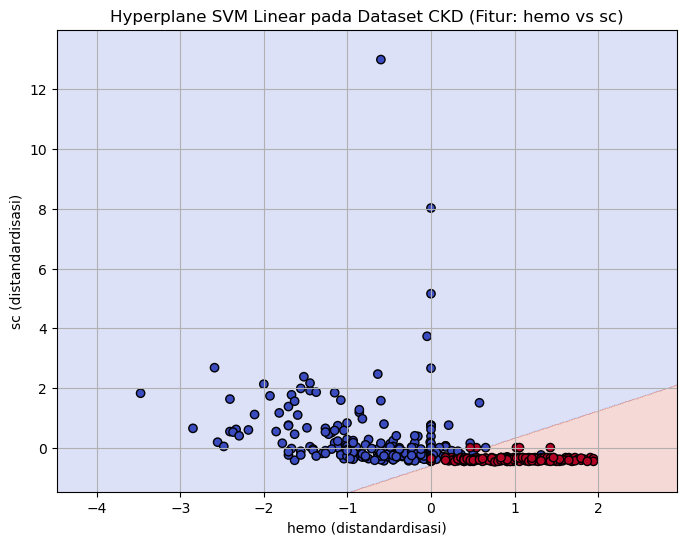

In [17]:
# Import yang dibutuhkan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
import arff

# Load dataset CKD dari file .arff
with open('chronic_kidney_disease_full.arff') as f:
    data = arff.load(f)

df = pd.DataFrame(data['data'], columns=[attr[0] for attr in data['attributes']])

# Ambil dua fitur numerik + label
df_viz = df[['hemo', 'sc', 'class']].copy()

#Bersihkan: ubah ke numerik dan isi NaN
df_viz['hemo'] = pd.to_numeric(df_viz['hemo'], errors='coerce')
df_viz['sc'] = pd.to_numeric(df_viz['sc'], errors='coerce')
df_viz['hemo'] = df_viz['hemo'].fillna(df_viz['hemo'].mean())
df_viz['sc'] = df_viz['sc'].fillna(df_viz['sc'].mean())

#Encode label ke angka
df_viz['class'] = df_viz['class'].map({'ckd': 0, 'notckd': 1})

#Hapus baris yang masih NaN (jika ada)
df_viz = df_viz.dropna()

#Pisahkan fitur dan label
X = df_viz[['hemo', 'sc']].values
y = df_viz['class'].values

#Normalisasi
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Latih model SVM Linear
model = SVC(kernel='linear')
model.fit(X_scaled, y)

#Buat mesh grid untuk area plot
x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                     np.linspace(y_min, y_max, 500))

#Prediksi semua titik dalam grid
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

#Visualisasi
plt.figure(figsize=(8,6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.2)
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.title("Hyperplane SVM Linear pada Dataset CKD (Fitur: hemo vs sc)")
plt.xlabel("hemo (distandardisasi)")
plt.ylabel("sc (distandardisasi)")
plt.grid(True)
plt.show()


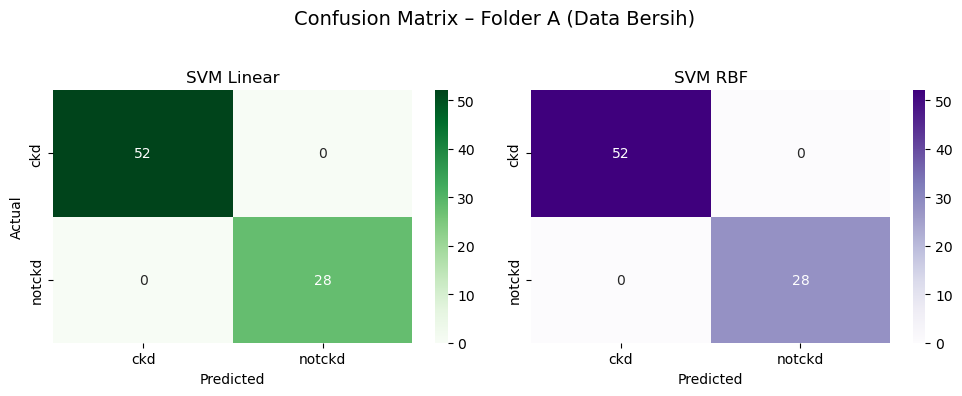

In [18]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Hitung confusion matrix untuk Linear dan RBF
cm_linear = confusion_matrix(y_test, y_pred_linear)
cm_rbf = confusion_matrix(y_test, y_pred_rbf)

# Buat figure berdampingan
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

# Confusion matrix Linear
sns.heatmap(cm_linear, annot=True, fmt='d', cmap='Greens',
            xticklabels=['ckd', 'notckd'], yticklabels=['ckd', 'notckd'],
            ax=axes[0])
axes[0].set_title("SVM Linear")
axes[0].set_xlabel("Predicted")
axes[0].set_ylabel("Actual")

# Confusion matrix RBF
sns.heatmap(cm_rbf, annot=True, fmt='d', cmap='Purples',
            xticklabels=['ckd', 'notckd'], yticklabels=['ckd', 'notckd'],
            ax=axes[1])
axes[1].set_title("SVM RBF")
axes[1].set_xlabel("Predicted")
axes[1].set_ylabel("")

# Tata letak
plt.suptitle("Confusion Matrix – Folder A (Data Bersih)", fontsize=14)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


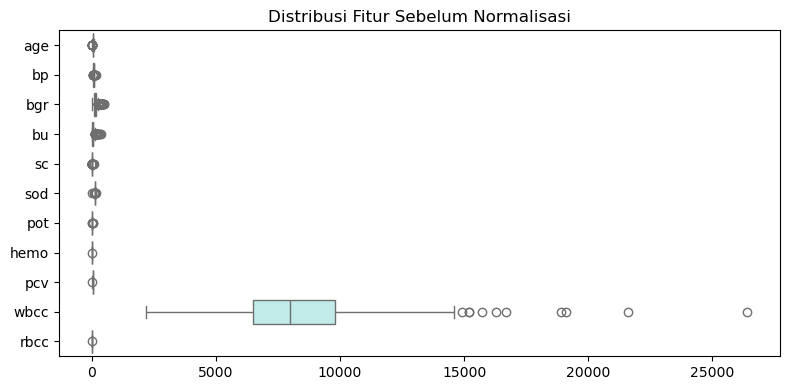

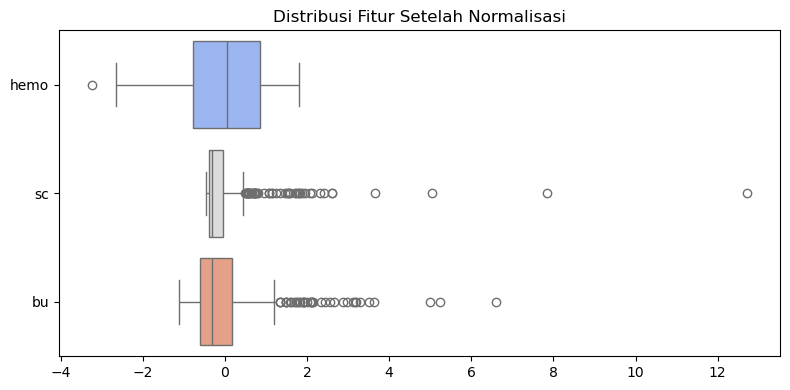

In [19]:
# Sebelum normalisasi
plt.figure(figsize=(8,4))
sns.boxplot(data=df[numerics], orient="h", palette="pastel")
plt.title("Distribusi Fitur Sebelum Normalisasi")
plt.tight_layout()
plt.show()

# Setelah normalisasi (contoh hanya 3 fitur)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df[numerics]), columns=numerics)

plt.figure(figsize=(8,4))
sns.boxplot(data=df_scaled[['hemo', 'sc', 'bu']], orient="h", palette="coolwarm")
plt.title("Distribusi Fitur Setelah Normalisasi")
plt.tight_layout()
plt.show()
